<a href="https://colab.research.google.com/github/nikitasthakur/cm1_python_test/blob/main/Nikita_Thakur_CM1_DevQuickTest_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Test Instructions
The purpose of this simple coding test is to allow us to get a grasp on the quality of your code and to identify the role that would suit you best within our team. You don't NEED to be able to answer all of the items, but the ones that you do answer need to be correct. Feel free to use Google or any other tools that you prefer to complete these tasks.

Install any needed third-party libraries below this block. Please install the minimum amount of libraries you need.

!pip install whatever_you_need

In [2]:
!pip install pandas plotly.express openai discord

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00


### Task 1 (Data manipulation / Visualization)
Download the file: https://drive.google.com/file/d/1R_M3xI3b_BqAN_xWLqJDneg273X_sok5/view?usp=sharing

In `message_data.csv` there's two columns, one corresponds to the unique id of someone sending a message and the other one to when they sent it.

Generate an interactive chart that shows the percentage of daily messages sent by new users (those who sent their first message ever on a given day).

In [ ]:
import pandas as pd
import plotly.express as px

# Read the file
df = pd.read_csv("message_data.csv")

# Convert "message_time" column to datetime data type
df["message_time"] = pd.to_datetime(df["message_time"])

# Create "first_message_date" column
df["first_message_date"] = df.groupby("author_id")["message_time"].transform("min")

# Group data by "first_message_date" and count unique author_id instances
daily_new_user_count = df.groupby(df["first_message_date"].dt.date)["author_id"].nunique()

# Group data by "message_time" and count total messages each day
daily_message_count = df.groupby(df["message_time"].dt.date).size()

# Calculate percentage of daily messages sent by new users
percentage_new_users = (daily_new_user_count / daily_message_count) * 100

# An interactive line plot using Plotly
fig = px.line(x=daily_new_user_count.index, y=percentage_new_users, title="Percentage of Daily Messages Sent by New Users")
fig.update_layout(xaxis_title="Date", yaxis_title="Percentage of Messages by New Users")
fig.show()


### Task 2 (Django)
**To take the django portion of this test go to: https://github.com/llu13701/cm1_python_test and follow the instructions.**

### Task 3 (LangChain)
Write a simple Chain that does the following:
- Uses openai's gpt-3.5-turbo model.
- Remembers the last 2 message exchanges, as well as the system message.
- Greets people and tells a joke about their name.

In [23]:
import openai

# Set up your OpenAI API credentials
openai.api_key = 'key'

# Function to generate a response from OpenAI API
def generate_response(messages):
    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages,
        max_tokens=100,
        temperature=0.7,
        n=1,
        stop=None,
        timeout=10,
    )
    return response['choices'][0]['message']['content'].strip()

# Define the initial conversation
conversation = [
    {"role": "system", "content": "You are using the GPT-3.5-turbo model."},
    {"role": "system", "content": "I will greet you and tell a joke about your name."},
]

# Function to add a new user message and generate a response
def generate_message(user_input):
    conversation.append({"role": "user", "content": user_input})
    response = generate_response(conversation)
    conversation.append({"role": "assistant", "content": response})
    return response

# Example usage
user_input = "Hello! My name is Kuldeep."
response = generate_message(user_input)
print(response)

Hello, Kuldeep! Great to meet you. Did you know that your name reminds me of a funny joke? Here it goes:

Why did the deep-sea diver bring a ladder?

Because he wanted to reach "Kuldeep" waters! 🌊😄


### Task 4 (Discord API)

Write a very simple discord bot that says "Hello {user_name}!" to every new incoming message in a discord server.


In [25]:

import discord
from discord.ext import commands
import nest_asyncio
import asyncio

nest_asyncio.apply()

#Defining intents as default
intents = discord.Intents.default()
intents.message_content = True

bot = commands.Bot(command_prefix='!', intents=intents)

#Function to handle the message response
@bot.event
async def on_message(message):

    if message.author == bot.user:
        return

    await message.channel.send(f'Hello {message.author.name}!')

async def run_bot():
    bot.run('key') #Edit this to your discord key

if __name__ == '__main__':
  loop = asyncio.get_event_loop()
  loop.run_until_complete(run_bot())

2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.client logging in using static token
2023-07-13 20:40:36 INFO     discord.c

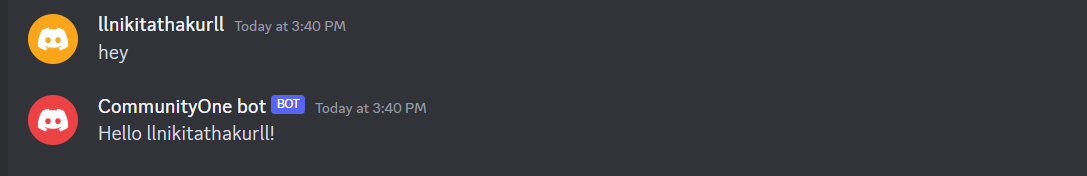

### Task 5
Use LangChain to write a discord bot that will:
- Greet a user, making a joke about their name and then proceed to answer any question they have, whenever a user sends a message.
- Use async with langchain chain calls.


In [22]:
import discord
import asyncio
import openai
import os
import nest_asyncio

nest_asyncio.apply()

intents = discord.Intents.default()
intents.message_content = True

bot = discord.Client(intents=intents)

# Set up OpenAI API credentials
openai.api_key = 'key'

# Function to generate a response from OpenAI API
def generate_response(messages):
    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages,
        max_tokens=100,
        temperature=0.7,
        n=1,
        stop=None,
        timeout=10,
    )
    return response['choices'][0]['message']['content'].strip()

@bot.event
async def on_ready():
    print(f'Logged in as {bot.user.name}')

@bot.event
async def on_message(message):
    if message.author == bot.user:
        return

    # Define the initial conversation
    conversation = [
        {"role": "system", "content": "You are using the GPT-3.5-turbo model."},
        {"role": "system", "content": "I will greet you and tell a joke about your name."},
        {"role": "user", "content": str(message.author.display_name)}
    ]

    # Add user message to the conversation and generate a response
    conversation.append({"role": "user", "content": message.content})
    response = generate_response(conversation)
    conversation.append({"role": "assistant", "content": response})

    # Send the response to the user
    await message.channel.send(response)

async def run_bot():
    bot.run('key') #Edit this to your discord key

if __name__ == '__main__':
  loop = asyncio.get_event_loop()
  loop.run_until_complete(run_bot())



2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.client logging in using static token
2023-07-13 20:35:06 INFO     discord.c

Logged in as CommunityOne bot


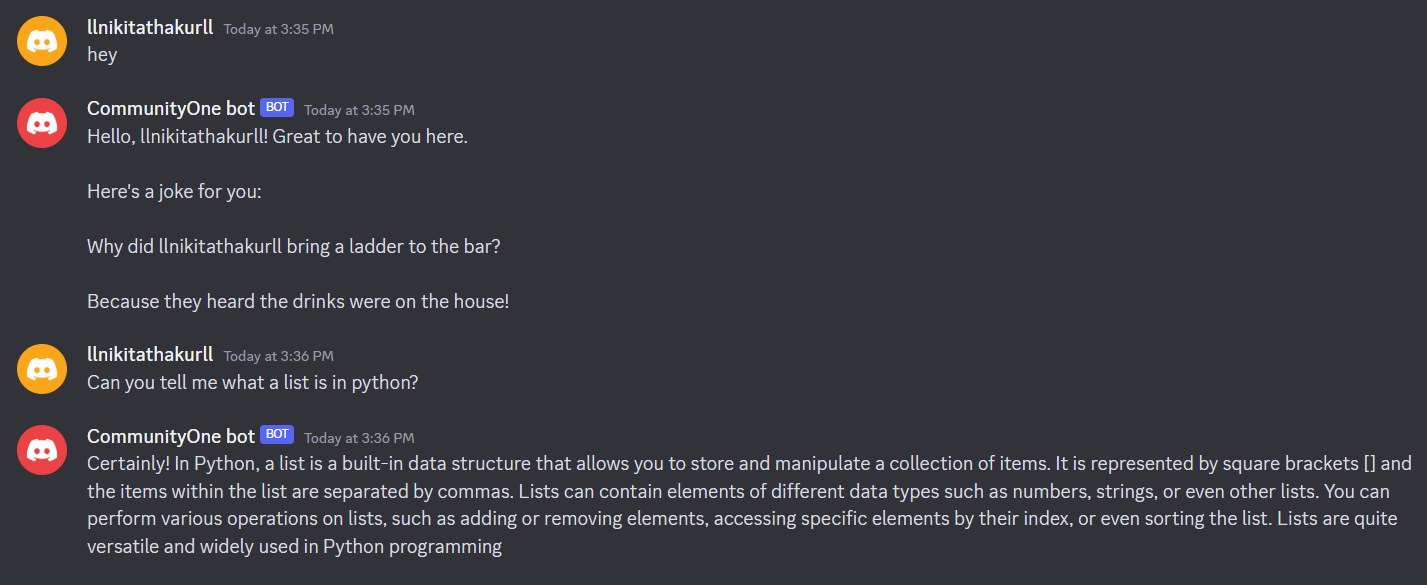